## Principal Component Analysis (PCA): Identifying the most important features that have the most impact on the target variable. It does this by finding the features that account for the most variance found in the data.

**Benefits from removing unimportant features:**<br>
- Faster training and inference.
- Data visualization becomes easier.

Principal Component Analysis (PCA) Process:**<br>
- Scale features.
- Keep in mind that accuracy might drop as you limit more features.
- Called a dimensionality reduction technique.

## Import dataset.

In [1]:
from sklearn.datasets import load_digits
import pandas as pd

dataset = load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [2]:
dataset.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 432x288 with 0 Axes>

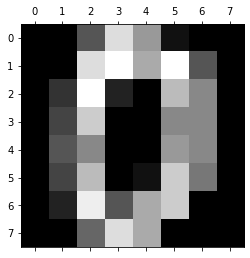

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.gray()
plt.matshow(dataset.data[0].reshape(8,8))

In [4]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [5]:
dataset.target

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


## Scale axes before training model.

In [8]:
x = df
y = dataset.target

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

## Perform training/testing sample set splits.

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=30)

## Train model using all 64 features. We get a 97% accuracy score.

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9722222222222222

## Use PCA to use components such that 95% of variance is retained. Feature set is reduced from 64 to 29. Train model using our 29 features and get an accuracy score of 97%.

In [25]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
x_pca = pca.fit_transform(x)
x_pca.shape

(1797, 29)

In [13]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [14]:
pca.n_components_

29

In [27]:
pd.DataFrame(x_pca).head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-1.259466,21.274883,-9.463055,13.014189,-7.128823,-7.440659,3.252837,2.553470,-0.581842,3.625697,...,-3.462119,2.680850,1.009450,2.009703,1.295315,1.178879,2.300582,3.670721,-0.943669,-1.132502
1,7.957611,-20.768699,4.439506,-14.893664,5.896249,-6.485622,2.126228,-4.615936,3.587450,-1.074705,...,-5.255708,-1.205777,-4.838902,0.860251,-2.974439,5.288817,0.119213,2.182618,-0.510227,2.313549
2,6.991923,-9.955986,2.958558,-12.288302,-18.126023,-4.507664,1.843122,-16.415200,0.719233,4.255805,...,8.731076,4.951115,-2.465109,5.999388,0.105727,-3.062671,0.166046,4.228821,2.157657,0.837958
3,-15.906105,3.332464,9.824372,-12.275838,6.965169,1.089483,-1.042085,10.973556,-3.259735,6.498753,...,-3.876889,0.269413,3.623236,2.538124,-1.354896,-1.740973,-1.340244,-5.846014,4.682220,-1.113042
4,23.306867,4.269061,-5.675129,-13.851524,-0.358124,-2.857574,-0.720497,13.041696,-3.835413,13.414164,...,5.035236,0.206830,5.740696,-7.611946,3.991408,2.781007,-0.166739,0.484305,0.627979,-3.287348


In [16]:
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=30)

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(x_train_pca, y_train)
model.score(x_test_pca, y_test)

0.9694444444444444

## Use PCA to limit to 2 features. We get an accuracy score of 60% so you can definitely see how reducing the number of features will reduce the accuracy of the model.

In [28]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
x_pca.shape

(1797, 2)

In [29]:
pd.DataFrame(x_pca).head()

,0,1
0,-1.259467,21.274884
1,7.957615,-20.768699
2,6.991922,-9.955987
3,-15.906111,3.332464
4,23.306874,4.269061


In [22]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

In [21]:
pca.n_components_

2

In [23]:
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=30)

model = LogisticRegression(max_iter=1000)
model.fit(x_train_pca, y_train)
model.score(x_test_pca, y_test)

0.6083333333333333